## Models

### Import Required Libraries

In [1]:
import pandas as pd
import matplotlib.pyplot as plotter_lib
import numpy as np
import PIL as image_lib
import tensorflow as tflow
from tensorflow.keras.layers import Flatten
from tensorflow.keras.layers import Dense
from tensorflow.keras.models import Sequential
from tensorflow.keras.optimizers import Adam

### Partition and Visualize Data

In [2]:
df = pd.read_csv('../data/df.csv', sep = '\t')

df['combined'] = df['gender'] + "_" + df['subCategory'] + "_" + df['articleType'] + "_" + \
                 df['baseColour'] + "_" + df['season'] + "_" + df['usage']

df

,id,gender,subCategory,articleType,baseColour,season,usage,image_path,gender_enc,subCategory_enc,articleType_enc,baseColour_enc,season_enc,usage_enc,combined
0,15970,Men,Topwear,Shirts,Navy Blue,Fall/Winter,Casual,../data/images/15970.jpg,2,1,6,10,0,0,Men_Topwear_Shirts_Navy Blue_Fall/Winter_Casual
1,39386,Men,Bottomwear,Jeans,Blue,Spring/Summer,Casual,../data/images/39386.jpg,2,0,2,2,1,0,Men_Bottomwear_Jeans_Blue_Spring/Summer_Casual
2,21379,Men,Bottomwear,Track Pants,Black,Fall/Winter,Casual,../data/images/21379.jpg,2,0,12,1,0,0,Men_Bottomwear_Track Pants_Black_Fall/Winter_C...
3,53759,Men,Topwear,Tshirts,Grey,Spring/Summer,Casual,../data/images/53759.jpg,2,1,14,7,1,0,Men_Topwear_Tshirts_Grey_Spring/Summer_Casual
4,1855,Men,Topwear,Tshirts,Grey,Spring/Summer,Casual,../data/images/1855.jpg,2,1,14,7,1,0,Men_Topwear_Tshirts_Grey_Spring/Summer_Casual
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
54338,13671,Unisex,Bottomwear,Jeans,Blue,Fall/Winter,Casual,../data/images/13671.jpg,3,0,2,2,0,0,Unisex_Bottomwear_Jeans_Blue_Fall/Winter_Casual
54339,33279,Unisex,Bottomwear,Jeans,Blue,Spring/Summer,Casual,../data/images/33279.jpg,3,0,2,2,1,0,Unisex_Bottomwear_Jeans_Blue_Spring/Summer_Casual
54340,13672,Unisex,Bottomwear,Jeans,Blue,Fall/Winter,Casual,../data/images/13672.jpg,3,0,2,2,0,0,Unisex_Bottomwear_Jeans_Blue_Fall/Winter_Casual
54341,33280,Unisex,Bottomwear,Jeans,Blue,Spring/Summer,Casual,../data/images/33280.jpg,3,0,2,2,1,0,Unisex_Bottomwear_Jeans_Blue_Spring/Summer_Casual


In [3]:
from sklearn.model_selection import train_test_split


# Calculate the value counts of the 'combined' column
combined_value_counts = df['combined'].value_counts()

# Find the combined values with a count of 1
combined_values_with_1_count = combined_value_counts[combined_value_counts == 1].index

# Remove rows with these combined values from the DataFrame
df_filtered = df[~df['combined'].isin(combined_values_with_1_count)]

# Split the filtered DataFrame into train and test sets while stratifying by 'combined'
train, test = train_test_split(df_filtered, test_size=0.2, random_state=123, stratify=df_filtered[['combined']])

# Append the rows with 1 count back to the train set
train = pd.concat([train, df[df['combined'].isin(combined_values_with_1_count)]])

# Verify the sizes of train and test sets
print("Original size:", len(df))
print("Train + Test size:", len(train), '+', len(test), '=', len(train) + len(test))

Original size: 54343
Train + Test size: 43481 + 10862 = 54343


In [4]:
import pandas as pd
import numpy as np
import tensorflow as tf
from tensorflow.keras.preprocessing.image import ImageDataGenerator


# Define image dimensions
img_height, img_width = 224, 224

# Define batch size
batch_size = 32

y_col = ["subCategory_enc", "articleType_enc", "gender_enc", "baseColour_enc", "season_enc", "usage_enc"]

# Create a custom data generator for training data
datagen = ImageDataGenerator(
    rescale=1.0/255.0,  # Normalize pixel values to the range [0, 1]
#     validation_split=0.2  # Specify validation split
)

# Use the flow_from_dataframe method to load and preprocess training images from the DataFrame
train_generator = datagen.flow_from_dataframe(
    dataframe=train,
    x_col="image_path",  # Column name in the DataFrame that contains image paths
    y_col=y_col,  # List of columns containing labels
    target_size=(img_height, img_width),
    batch_size=batch_size,
#     subset="training",  # Specify training subset
    class_mode="multi_output",  # Use "multi_output" mode for multiple labels
    shuffle=True,  # Shuffle the data
    seed=123  # Random seed for reproducibility
)

# Use the flow_from_dataframe method to load and preprocess validation images from the DataFrame
validation_generator = datagen.flow_from_dataframe(
    dataframe=test, 
    x_col="image_path",  # Column name in the DataFrame that contains image paths
    y_col=y_col,  # List of columns containing labels
    target_size=(img_height, img_width),
    batch_size=batch_size,
#     subset="validation",  # Specify validation subset
    class_mode="multi_output",  # Use "multi_output" mode for multiple labels
    shuffle=False,  # No need to shuffle the validation data
    seed=123  # Random seed for reproducibility
)

# You can use the generated data for training and validation
# For example, you can fit a model using model.fit(train_generator, validation_data=validation_generator)

Found 43475 validated image filenames.


C:\Users\Lefteris_Souflas\anaconda3\lib\site-packages\keras\src\preprocessing\image.py:1137: UserWarning: Found 6 invalid image filename(s) in x_col="image_path". These filename(s) will be ignored.
  warnings.warn(


Found 10860 validated image filenames.


C:\Users\Lefteris_Souflas\anaconda3\lib\site-packages\keras\src\preprocessing\image.py:1137: UserWarning: Found 2 invalid image filename(s) in x_col="image_path". These filename(s) will be ignored.
  warnings.warn(


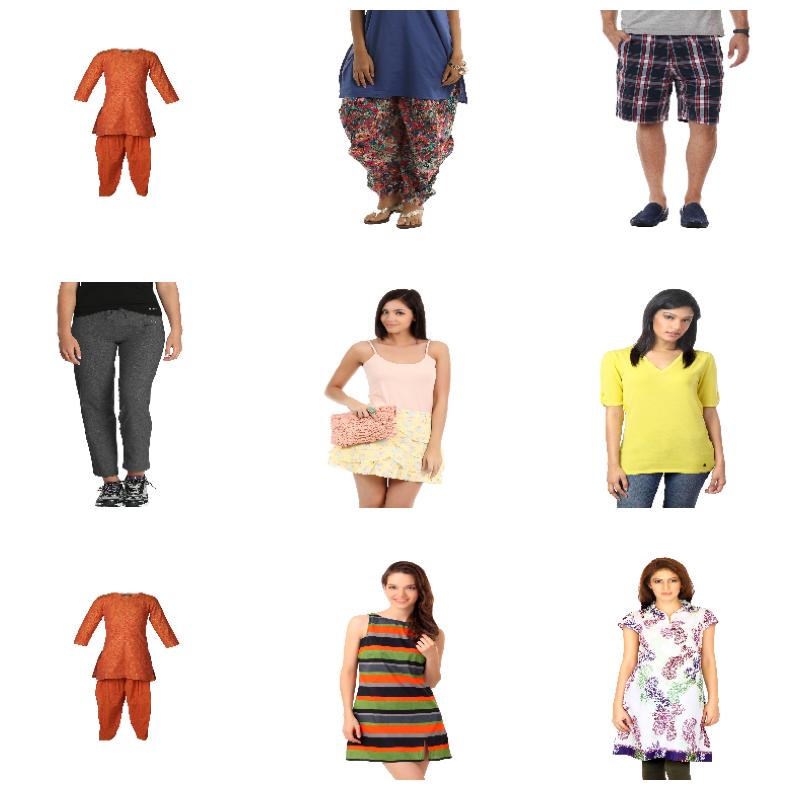

In [5]:
import matplotlib.pyplot as plt


# Generate a batch of images and labels from the train_generator
images, labels = train_generator.next()

# Create a grid for visualization
num_images = min(len(images), 9)  # Limit the number of images to 9 for a 3x3 grid
plt.figure(figsize=(10, 10))

for i in range(num_images):
    plt.subplot(3, 3, i + 1)
    plt.imshow(images[i])
#     plt.title("Label: " + labels[i])
    plt.axis("off")

plt.show()

### Import the Pre-trained Model

In [6]:
import tensorflow as tf
from tensorflow.keras.layers import Input, Dense, Flatten
from tensorflow.keras.models import Model
from tensorflow.keras.applications import ResNet50

# Define image dimensions
img_height, img_width = 224, 224

# Define batch size
batch_size = 32

# Create a custom data generator for training data (replace this with your data loading code)
# train_generator = ...

# Use the ResNet50 pretrained model as the feature extractor
resnet_model = ResNet50(include_top=False,
                        input_shape=(img_height, img_width, 3),
                        pooling='avg',
                        weights='imagenet')

# Freeze the layers of the ResNet50 model to use it as a feature extractor
for layer in resnet_model.layers:
    layer.trainable = False

# Create the multi-output model
inputs = Input(shape=(img_height, img_width, 3))
x = tf.keras.applications.resnet50.preprocess_input(inputs)
x = resnet_model(x)
x = Flatten()(x)
x = Dense(512, activation='relu')(x)

# Define the number of classes for each output column
num_classes_gender = len(df['gender'].unique())
num_classes_articleType = len(df['articleType'].unique())
num_classes_baseColour = len(df['baseColour'].unique())
num_classes_season = len(df['season'].unique())
num_classes_usage = len(df['usage'].unique())

# Output layers for each output column
subCategory_output = Dense(1, activation='sigmoid', name='subCategory_output')(x)
articleType_output = Dense(num_classes_articleType, activation='softmax', name='articleType_output')(x)
gender_output = Dense(num_classes_gender, activation='softmax', name='gender_output')(x)
baseColour_output = Dense(num_classes_baseColour, activation='softmax', name='baseColour_output')(x)
season_output = Dense(1, activation='sigmoid', name='season_output')(x)
usage_output = Dense(num_classes_usage, activation='softmax', name='usage_output')(x)

# Create the model with multiple output layers
model = Model(inputs=inputs, outputs=[subCategory_output, articleType_output, gender_output, 
                                      baseColour_output, season_output, usage_output])

# Compile the model with appropriate loss functions for each output
model.compile(optimizer='adam',
              loss={'subCategory_output': 'binary_crossentropy',
                    'articleType_output': 'sparse_categorical_crossentropy',  
                    'gender_output': 'sparse_categorical_crossentropy',
                    'baseColour_output': 'sparse_categorical_crossentropy',
                    'season_output': 'binary_crossentropy',
                    'usage_output': 'sparse_categorical_crossentropy'},
              metrics=['accuracy'])

In [8]:
model.summary()

Model: "model"
__________________________________________________________________________________________________
 Layer (type)                Output Shape                 Param #   Connected to                  
 input_2 (InputLayer)        [(None, 224, 224, 3)]        0         []                            
                                                                                                  
 tf.__operators__.getitem (  (None, 224, 224, 3)          0         ['input_2[0][0]']             
 SlicingOpLambda)                                                                                 
                                                                                                  
 tf.nn.bias_add (TFOpLambda  (None, 224, 224, 3)          0         ['tf.__operators__.getitem[0][
 )                                                                  0]']                          
                                                                                              

### Train Model

In [9]:
epochs=100
early_stopping_callback = tf.keras.callbacks.EarlyStopping(monitor='val_loss', 
                                            patience=4, 
                                            verbose=1, 
                                            restore_best_weights=True)

checkpoint_filepath = 'checkpoints/weights.{epoch:02d}-{val_loss:.2f}.hdf5'
model_checkpoint_callback = tf.keras.callbacks.ModelCheckpoint(
    filepath=checkpoint_filepath,
    save_weights_only=True,
    monitor='val_loss',
    mode='min',
    save_best_only=True)

history = model.fit(train_generator, validation_data=validation_generator, epochs=epochs,
                    callbacks=[early_stopping_callback, model_checkpoint_callback])

Epoch 1/100
   8/1359 [..............................] - ETA: 43:49 - loss: 9.5091 - subCategory_output_loss: 0.6570 - articleType_output_loss: 2.8139 - gender_output_loss: 1.3206 - baseColour_output_loss: 2.9631 - season_output_loss: 0.6965 - usage_output_loss: 1.0580 - subCategory_output_accuracy: 0.6484 - articleType_output_accuracy: 0.1367 - gender_output_accuracy: 0.4258 - baseColour_output_accuracy: 0.1055 - season_output_accuracy: 0.6250 - usage_output_accuracy: 0.6680

KeyboardInterrupt: 

In [ ]:
# Export model
model.save('trained_model')
# model = load.model('xxx.hdf5')
# # The model weights (that are considered the best) are loaded into the model.
# model.load_weights(checkpoint_filepath)

### Evaluate Model

In [ ]:
# Combine the lists into a 2D array
accuracy_matrix = np.array([history.history['subCategory_output_accuracy'], 
                            history.history['articleType_output_accuracy'], 
                            history.history['gender_output_accuracy'], 
                            history.history['baseColour_output_accuracy'], 
                            history.history['season_output_accuracy'], 
                            history.history['usage_output_accuracy']])

# Calculate the average for each position (across all lists)
accuracy = np.mean(accuracy_matrix, axis=0)

In [ ]:
# Combine the lists into a 2D array
val_accuracy_matrix = np.array([history.history['val_subCategory_output_accuracy'], 
                            history.history['val_articleType_output_accuracy'], 
                            history.history['val_gender_output_accuracy'], 
                            history.history['val_baseColour_output_accuracy'], 
                            history.history['val_season_output_accuracy'], 
                            history.history['val_usage_output_accuracy']])

# Calculate the average for each position (across all lists)
val_accuracy = np.mean(val_accuracy_matrix, axis=0)

In [ ]:
plotter_lib.figure(figsize=(8, 8))
epochs_range= range(epochs)
plotter_lib.plot(epochs_range, accuracy, label="Training Accuracy")
plotter_lib.plot(epochs_range, val_accuracy, label="Validation Accuracy")
plotter_lib.axis(ymin=0.4,ymax=1)
plotter_lib.grid()
plotter_lib.title('Model Accuracy')
plotter_lib.ylabel('Accuracy')
plotter_lib.xlabel('Epochs')
plotter_lib.legend(['train', 'validation'])

# plotter_lib.show()
# plotter_lib.savefig('output-plot_accuracy.png') 

In [ ]:
plotter_lib.figure(figsize=(8, 8))
epochs_range= range(epochs)
plotter_lib.plot(epochs_range, accuracy, label="Training Accuracy")
plotter_lib.plot(epochs_range, val_accuracy, label="Validation Accuracy")
plotter_lib.axis(ymin=0.4,ymax=1)
plotter_lib.grid()
plotter_lib.title('Model Accuracy')
plotter_lib.ylabel('Accuracy')
plotter_lib.xlabel('Epochs')
plotter_lib.legend(['train', 'validation'])

# plotter_lib.show()
# plotter_lib.savefig('output-plot_accuracy.png') 

In [ ]:
plotter_lib.figure(figsize=(8, 8))
epochs_range= range(epochs)
plotter_lib.plot( epochs_range, history.history['loss'], label="Training Loss")
plotter_lib.plot(epochs_range, history.history['val_loss'], label="Validation Loss")
plotter_lib.axis(ymin=0,ymax=10)
plotter_lib.grid()
plotter_lib.title('Model Loss')
plotter_lib.ylabel('Loss')
plotter_lib.xlabel('Epochs')
plotter_lib.legend(['train', 'validation'])

# plotter_lib.show()
# plotter_lib.savefig('output-plot_loss.png') 